**Introducción a la Regresión y al Dataset de Películas**

1. Discusión breve sobre las aplicaciones de la regresión en la industria cinematográfica.
2. Explicación del dataset: qué representan las variables, su naturaleza y relevancia en modelos de predicción.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Carga de los datos
data= pd.read_csv('movie_metadata_new.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   3952 non-null   float64
 1   duration                 3952 non-null   float64
 2   director_facebook_likes  3952 non-null   float64
 3   actor_3_facebook_likes   3952 non-null   float64
 4   actor_1_facebook_likes   3952 non-null   float64
 5   gross                    3952 non-null   float64
 6   num_user_for_reviews     3952 non-null   float64
 7   budget                   3952 non-null   float64
 8   title_year               3952 non-null   float64
 9   actor_2_facebook_likes   3952 non-null   float64
 10  imdb_score               3952 non-null   float64
 11  aspect_ratio             3952 non-null   float64
 12  movie_facebook_likes     3952 non-null   float64
dtypes: float64(13)
memory usage: 401.5 KB


Regresión Lineal para la Predicción de Ingresos Brutos

1. Selección de Variable Objetivo y Variables Predictoras: Identificar la variable gross (ingresos brutos) como objetivo y seleccionar variables predictoras como budget (presupuesto), num_critic_for_reviews y actor_1_facebook_likes. Discutir la posible influencia de estas variables en los ingresos de una película.

In [3]:
#Definir variables predictoras y variable objetivo
x= data[['budget', 'num_critic_for_reviews', 'actor_1_facebook_likes']]
y= data['gross']

Análisis de Correlación y Visualización de Relaciones: Crear gráficos de dispersión y analizar la correlación entre gross y otras variables, buscando identificar patrones que sugieran relaciones lineales.


Text(0.5, 1.0, 'Relación entre Gross y Budget')

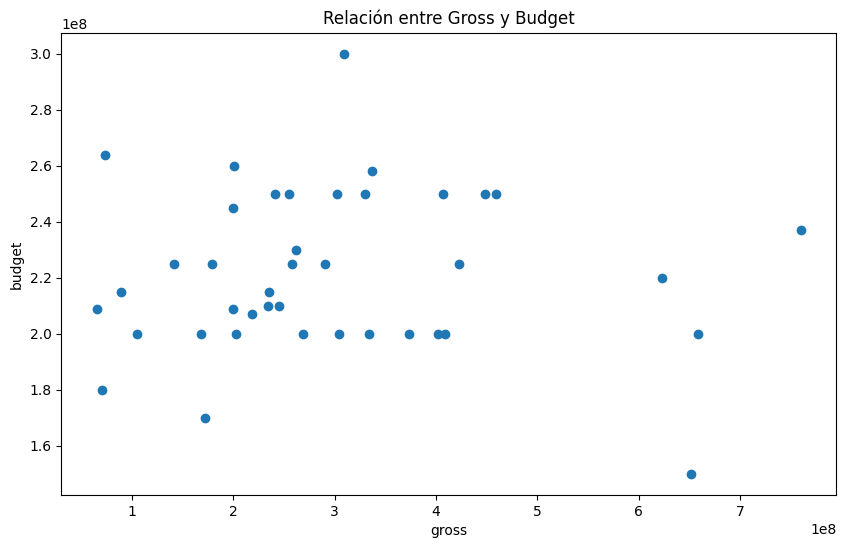

In [6]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['gross'].head(40), data['budget'].head(40))
plt.xlabel('gross')
plt.ylabel('budget')
plt.title('Relación entre Gross y Budget')

Text(0.5, 1.0, 'Relación entre Gross y Num_critic_for_reviews')

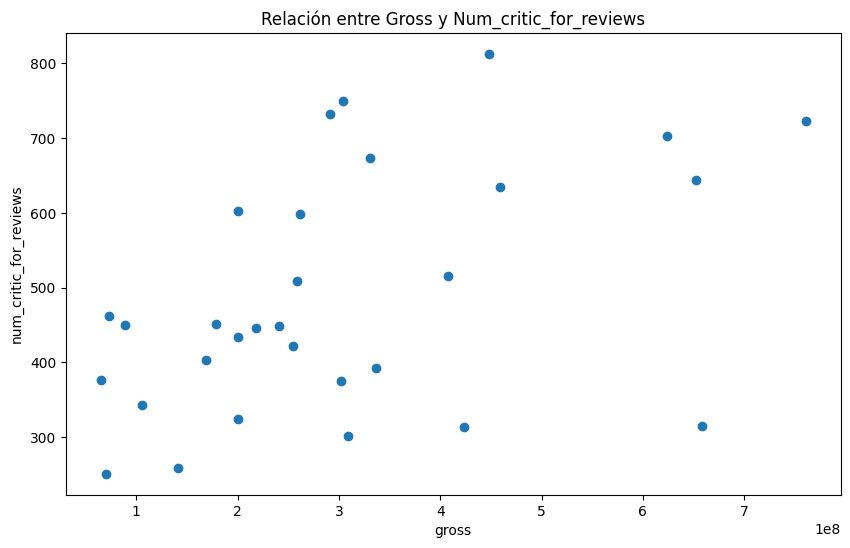

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(data['gross'].head(30), data['num_critic_for_reviews'].head(30))
plt.xlabel('gross')
plt.ylabel('num_critic_for_reviews')
plt.title('Relación entre Gross y Num_critic_for_reviews')

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['gross'].head(30), data['budget'].head(30))
plt.xlabel('gross')
plt.ylabel('budget')
plt.title('Relación entre Gross y Budget')

Construcción del Modelo de Regresión Lineal: Entrenar un modelo de regresión lineal para predecir gross a partir de las variables seleccionadas. Discutir el proceso de ajuste de los coeficientes del modelo.

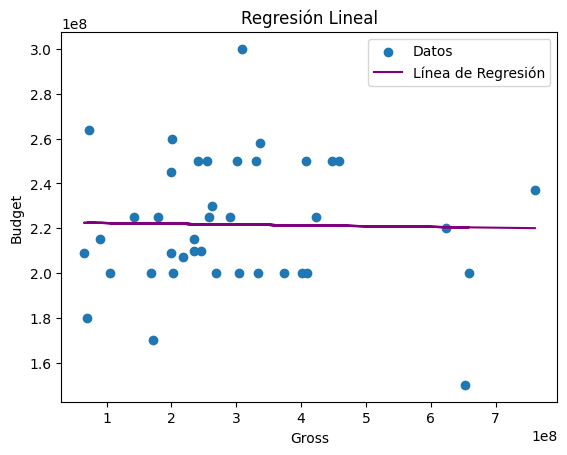

Pendiente: -0.0034687980264013953
Intersección: 222625301.26567823
R-cuadrado: 0.00039297397842888914


In [14]:
import numpy as np
from scipy import stats

x_values= np.array(data['gross'].head(40))
y_values= np.array(data['budget'].head(40))

#Calculo de la pendiente e interseccion
slope, intercept, r_value, p_value, std_err= stats.linregress(x_values,y_values)
y_pred= slope * x_values + intercept

plt.scatter(x_values, y_values, label='Datos')
plt.plot(x_values, y_pred, color='purple', label='Línea de Regresión')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.legend()
plt.title('Regresión Lineal')
plt.show()

print("Pendiente:", slope)
print("Intersección:", intercept)
print("R-cuadrado:", r_value**2)

In [22]:
# Ejemplo: predecir el gross para 237384792343 budget
budget = 1000000000
gross_pred= (slope * budget) + intercept
print("Predicción de Gross (Numpy y Scipy) para", budget,   "budget:", gross_pred)

Predicción de Gross (Numpy y Scipy) para 1000000000 budget: 219156503.23927683


Evaluación e Interpretación del Modelo:
1. Explicar las métricas de evaluación como el error cuadrático medio (MSE) y el coeficiente de determinación (R²) para medir la precisión del modelo.

2. Analizar los coeficientes de las variables predictoras e interpretar su influencia en los ingresos brutos.

3. Aplicaciones Prácticas y Predicción: Realizar predicciones de ingresos brutos para algunas películas del dataset y discutir cómo esta información podría usarse en la toma de decisiones en la industria cinematográfica.